In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read sub
#sub = pd.read_csv('../subs/lgbm_v7.1.1_0.5845.csv')

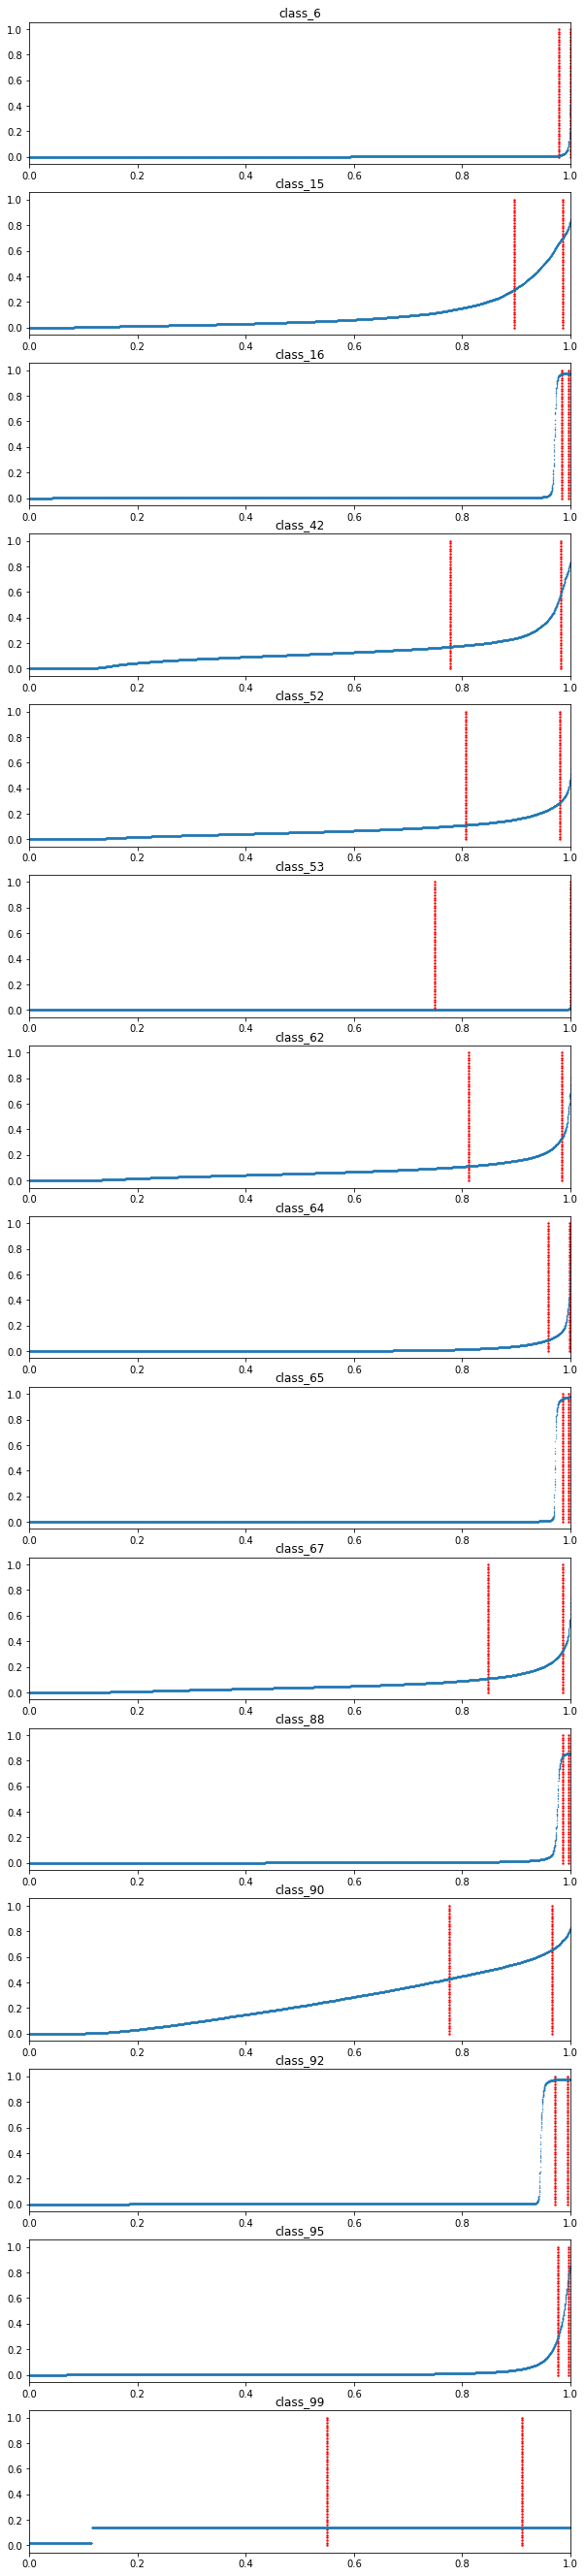

In [26]:
f,axes = plt.subplots(15,1,figsize=(10,48))

for i,col in enumerate(list(sub.columns)[1:]):
    y = sub[col].values
    y_sparse = np.sort(y[::300])
    
    # Cumpercent
    cp = np.cumsum(y_sparse)/np.sum(y_sparse)
    # Prob lines
    for p in [0.5, 0.9]:
        n_line = 50
        x_l = np.ones(n_line) * np.where(cp>p)[0][0]
        y_l = np.linspace(0,1,n_line)
        axes[i].scatter(x=x_l.astype(float)/y_sparse.shape[0], y=y_l, s=2, c='red')
    
    axes[i].scatter(x=np.arange(y_sparse.shape[0]).astype(float)/y_sparse.shape[0], y=y_sparse, s=0.1)
    axes[i].set_title(col)
    axes[i].set_xlim(0,1)    
plt.show()

In [75]:
# Read sub
sub = pd.read_csv('../subs/lgbm_v8.5_0.5826.csv')

In [97]:
orig_sub = sub.iloc[:,1:].values

# Restore sub to pre 99
mult_col = 1 - orig_sub[:,-1]
mult_col = mult_col[:, None]
rest_sub = orig_sub / mult_col

# Assign mystery method to c99
reference_prob = 0.16*2
c99_cols = 1 - rest_sub[:,:-1]
num = np.multiply.reduce(c99_cols, axis=1, keepdims=True)
c99_col = num / np.mean(c99_cols, axis=1, keepdims=True)
equalizing_const = reference_prob / np.mean(c99_col)
c99_col *= equalizing_const
rest_sub[:,[-1]] = c99_col
rest_sub[:,:-1] *= (1 - c99_col)
np.mean(c99_col)

0.3199999999999995

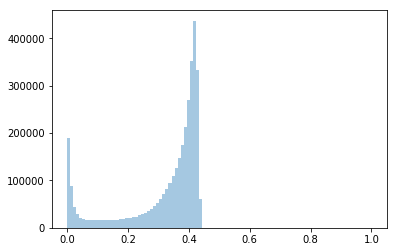

In [98]:
import seaborn as sns
sns.distplot(c99_col, bins=np.linspace(0,1,100), kde=False)
#max_n = 2
#argmax_n = np.argsort(rest_sub[:,:-1], axis=1)[:,::-1][:,max_n-1]

In [69]:
new_sub_df = sub.copy()
new_sub_df.iloc[:,1:] = rest_sub
new_sub_df.to_csv('c99_ref16_squared.csv', index=False, float_format='%.3f')

In [109]:
a = np.random.randint(0,5,(10,4))

In [110]:
a

array([[1, 2, 3, 0],
       [1, 3, 1, 4],
       [1, 4, 0, 1],
       [3, 2, 4, 2],
       [1, 0, 4, 3],
       [1, 3, 4, 0],
       [4, 1, 2, 2],
       [0, 0, 4, 4],
       [0, 1, 2, 2],
       [0, 2, 0, 1]])

In [116]:
for l in a:
    u,c = np.unique(l, return_counts=True)
    print('Maj ',u[np.argmax(c)])

Maj  0
Maj  1
Maj  1
Maj  2
Maj  0
Maj  0
Maj  2
Maj  0
Maj  2
Maj  0
